# <center>PREDICTING PRICE OF USED CARS IN KSA

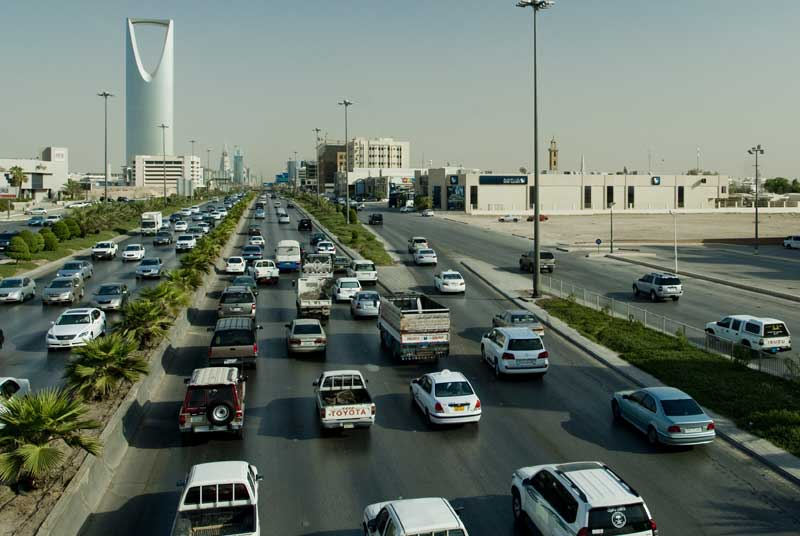

##### Dataset Link
https://www.kaggle.com/datasets/reemalruqi/used-cars-in-saudi-arabia

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv('./used_car_cleaned.csv')
data

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
2,Great,Wall,0.0,Automatic,2022,135000.0
3,Ford,Fusion,178000.0,Automatic,2012,23000.0
4,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0
...,...,...,...,...,...,...
2282,BMW,7,99000.0,Automatic,2015,103000.0
2283,Ford,Expedition,33000.0,Automatic,2018,185000.0
2284,Chevrolet,Tahoe,48000.0,Automatic,2018,135000.0
2285,Chevrolet,Tahoe,50000.0,Automatic,2018,135000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_brand         2287 non-null   object 
 1   car_model         2287 non-null   object 
 2   car_driven        2287 non-null   float64
 3   car_transmission  2287 non-null   object 
 4   car_model_year    2287 non-null   int64  
 5   car_price         2287 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 107.3+ KB


In [4]:
data.shape

(2287, 6)

In [5]:
data.describe()

,car_driven,car_model_year,car_price
count,2.287000e+03,2287.000000,2.287000e+03
mean,9.962084e+04,2014.229996,8.955938e+04
std,1.425457e+05,3.644710,1.046340e+06
min,0.000000e+00,1979.000000,1.230000e+02
25%,1.865200e+04,2013.000000,2.655000e+04
50%,7.118800e+04,2015.000000,5.199900e+04
75%,1.472500e+05,2017.000000,9.345000e+04
max,4.005235e+06,2022.000000,5.000000e+07


In [6]:
data.isnull().mean()*100

car_brand           0.0
car_model           0.0
car_driven          0.0
car_transmission    0.0
car_model_year      0.0
car_price           0.0
dtype: float64

In [7]:
data.duplicated().sum()

1184

In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

##### univariate analysis

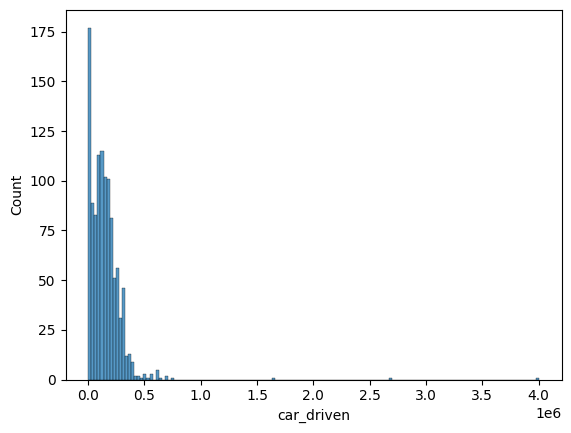

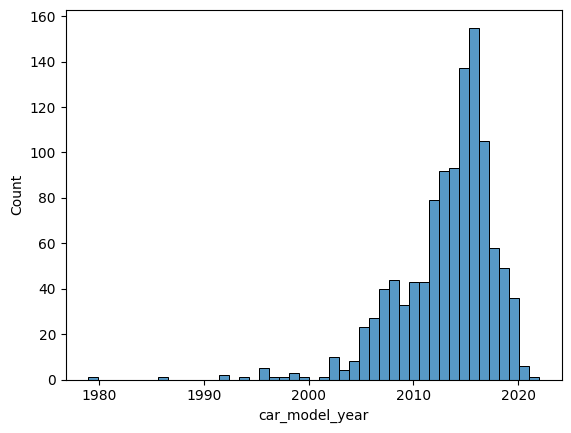

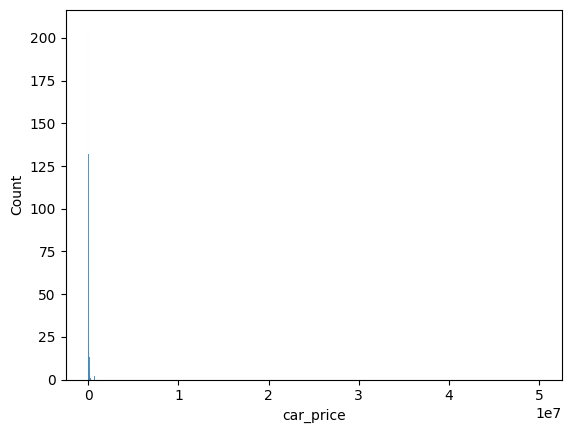

In [9]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x=data[i])
        plt.show()

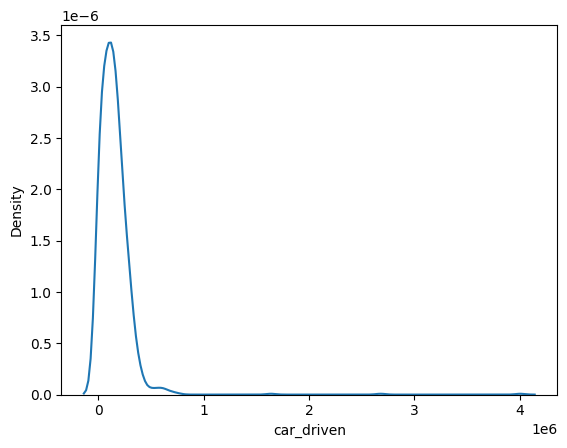

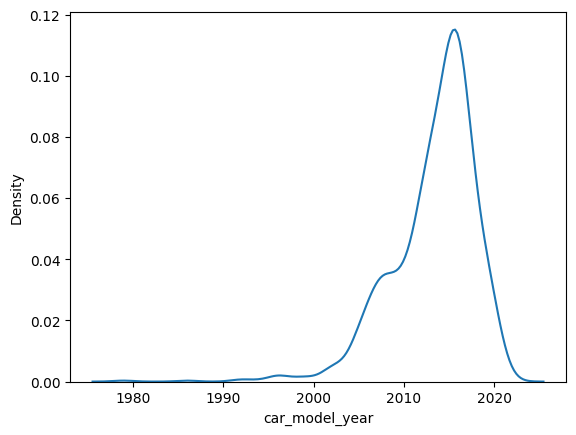

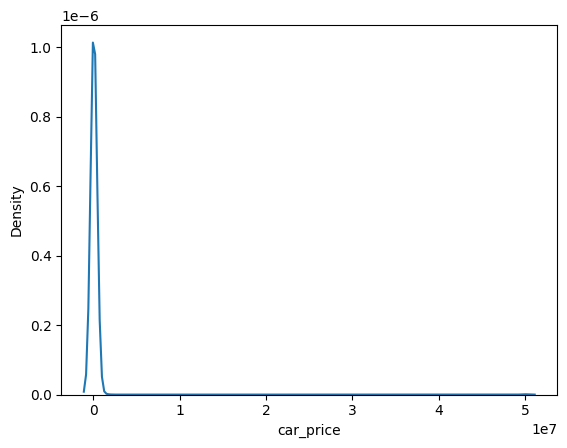

In [10]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x=data[i])
        plt.show()

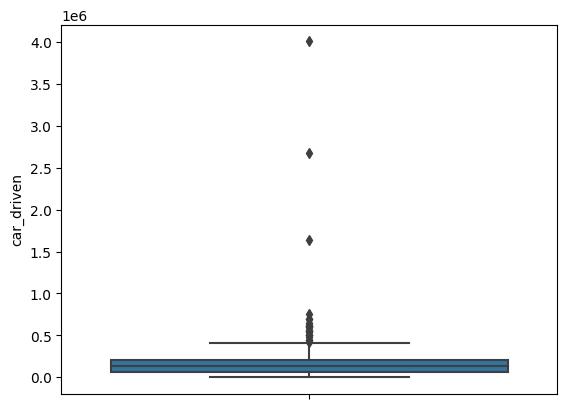

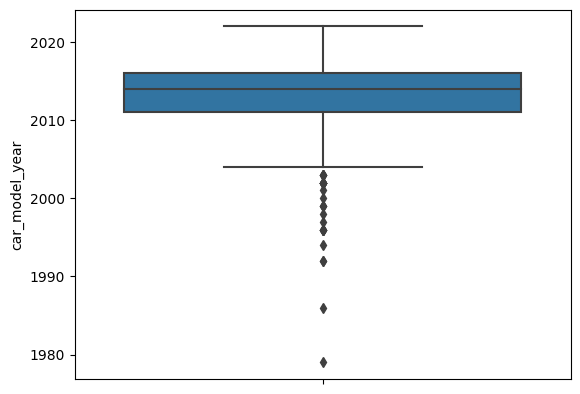

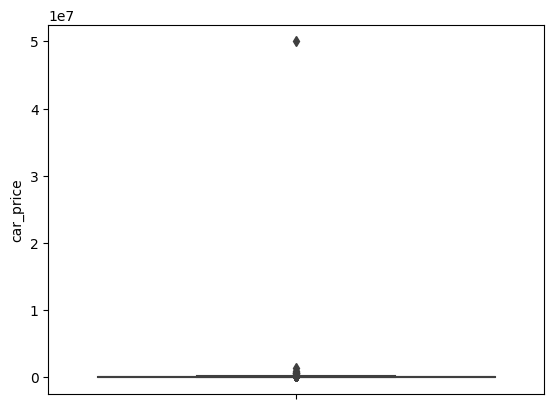

In [11]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y= data[i])
        plt.show()

##### Multi variate analysis

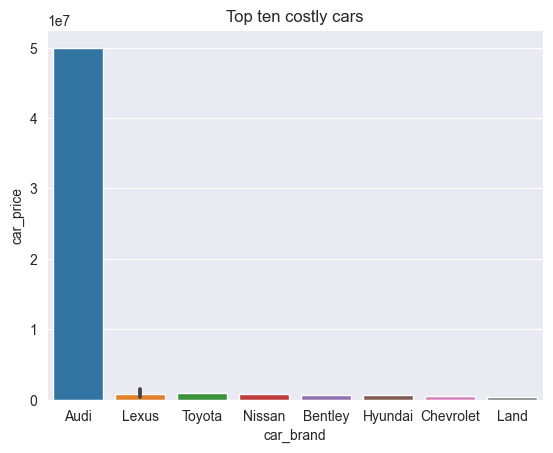

In [12]:
sns.set_style('darkgrid')
plt.title('Top ten costly cars')
sns.barplot(x='car_brand', y='car_price', data=data.sort_values(by='car_price', ascending=False)[:10]);

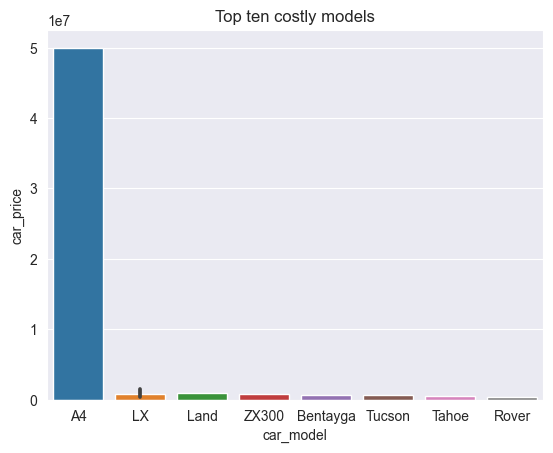

In [13]:
plt.title('Top ten costly models')
sns.barplot(x='car_model', y='car_price', data=data.sort_values(by='car_price', ascending=False)[:10]);

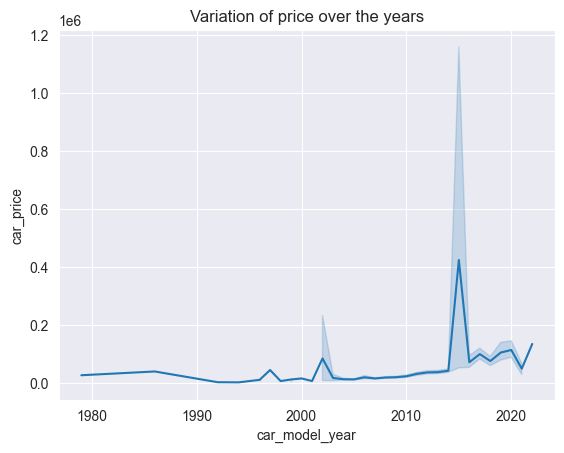

In [14]:
plt.title('Variation of price over the years')
sns.lineplot(x='car_model_year', y='car_price', data=data.sort_values(by='car_model_year'));

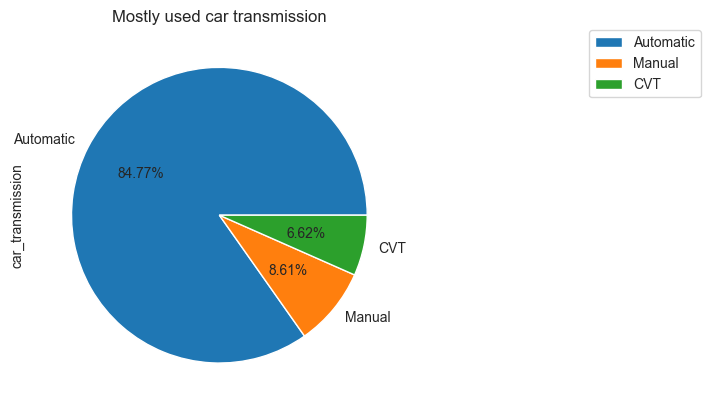

In [15]:
sns.set_style('ticks')
plt.title('Mostly used car transmission')
data.car_transmission.value_counts().plot.pie(autopct='%0.2f%%');
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left', borderaxespad=0);

##### Outlier Treatment

In [16]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [17]:
for column in data.columns:
    if data[column].dtype!='object':
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])

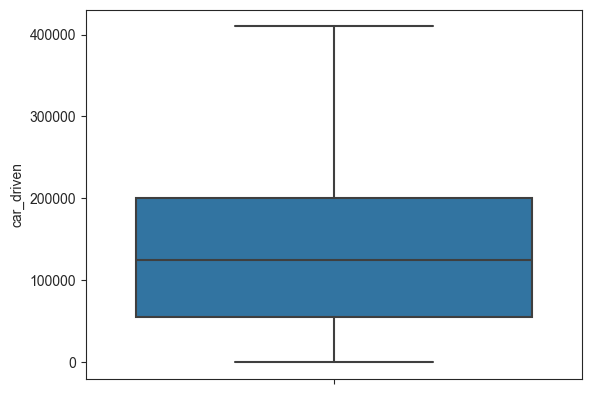

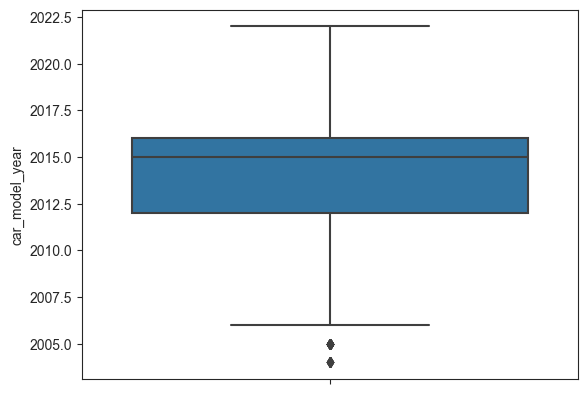

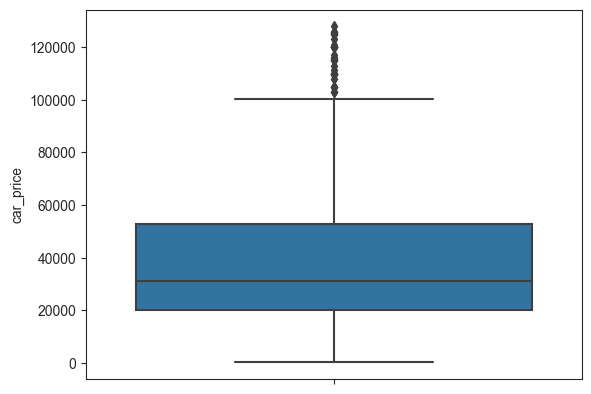

In [18]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

In [19]:
data.dropna(inplace=True)

#### Label encoding the categorical columns

In [20]:
le = LabelEncoder()

In [21]:
data['car_brand'] = le.fit_transform(data['car_brand'])
data['car_model'] = le.fit_transform(data['car_model'])
data['car_transmission'] = le.fit_transform(data['car_transmission'])
data

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,19,171,83491.0,0,2018.0,64000.0
1,7,169,222000.0,0,2009.0,20000.0
3,12,92,178000.0,0,2012.0,23000.0
4,34,25,10500.0,0,2020.0,32000.0
5,18,102,1000.0,0,2021.0,80000.0
...,...,...,...,...,...,...
2279,26,69,82000.0,0,2017.0,113000.0
2280,26,69,116000.0,0,2015.0,85000.0
2281,26,69,87000.0,0,2015.0,115000.0
2282,3,13,99000.0,0,2015.0,103000.0


##### Checking the correlation with the target 'car_price'

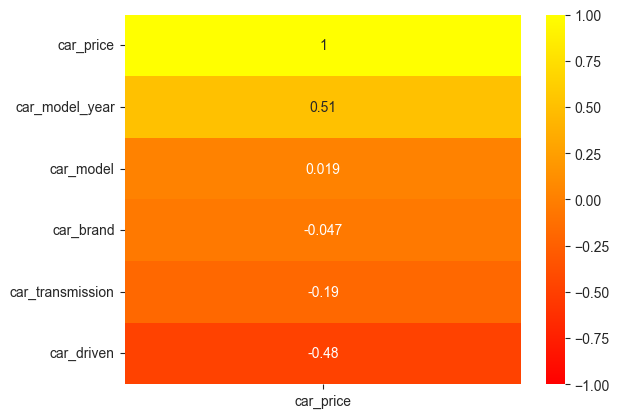

In [22]:
sns.heatmap(data.corr()[["car_price"]].sort_values(by="car_price", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn");

##### Let's take only the columns with good correlation with the target

In [23]:
x= data[[ 'car_model_year', 'car_model']].values
y = data[['car_price']].values

##### Feature Scaling

In [24]:
sc = StandardScaler()

In [25]:
x = sc.fit_transform(x)

##### Model Building

In [26]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [27]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  22961.281602911477
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  22960.975520200274
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  46805.27712771118
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  20754.164420479916
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  19153.860374845237
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  23283.968923847882
*******************************************

##### We can see that "RandomForestRegressor" is having the best overall perfomance so far. We may proceed with it.

In [28]:
model=RandomForestRegressor()

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
y_pred = model.predict(x)

In [32]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [33]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,64000.0,64183.326333
1,20000.0,22265.750000
2,23000.0,24570.465714
3,32000.0,39090.420000
4,80000.0,70775.150000


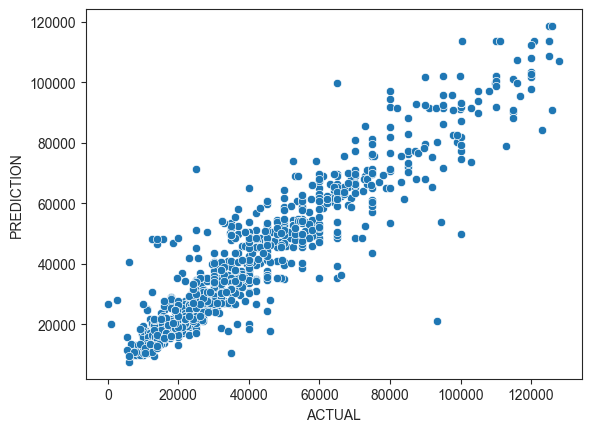

In [34]:
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");